# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np
def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
# reading the data file

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [3]:
# checking the head

df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [4]:
#creating new columns from Date 

df["M-D"] = df["Date"].str[5:]
df["Year"] = df["Date"].str[:4]

# removing leap day i.e (02-29) 2nd feb

df = df[df["M-D"] != "02-29"]

In [6]:
df.head()

,ID,Date,Element,Data_Value,M-D,Year
0,USW00094889,2014-11-12,TMAX,22,11-12,2014
1,USC00208972,2009-04-29,TMIN,56,04-29,2009
2,USC00200032,2008-05-26,TMAX,278,05-26,2008
3,USC00205563,2005-11-11,TMAX,139,11-11,2005
4,USC00200230,2014-02-27,TMAX,-106,02-27,2014


In [21]:
#record high and record low temperatures by day of the year over the period 2005-2014

max_t = df[(df["Year"] != "2015") & (df["Element"] == "TMAX")][["Data_Value", "M-D"]].groupby("M-D").max()
min_t = df[(df["Year"] != "2015") & (df["Element"] == "TMIN")][["Data_Value", "M-D"]].groupby("M-D").min()

#record high and record low temperatures by day of the year 2015

max_t_2015 = df[(df["Year"] == "2015") & (df["Element"] == "TMAX")][["Data_Value", "M-D"]].groupby("M-D").max()
min_t_2015 = df[(df["Year"] == "2015") & (df["Element"] == "TMIN")][["Data_Value", "M-D"]].groupby("M-D").min()

# checking for days when the record was broken in 2015

max_br = np.where(max_t_2015["Data_Value"] > max_t["Data_Value"])[0]
min_br = np.where(min_t_2015["Data_Value"] < min_t["Data_Value"])[0]

#printing results

print("Record High broken in 2015: (", end="")
print(len(max_br),end="")
print(" times)")
print("")
print(max_br)
print("--------------------------------------------------------------------------")
print("Record Low broken in 2015: (", end="")
print(len(min_br),end="")
print(" times)")
print("")
print(min_br)


Record High broken in 2015: (37 times)

[ 39 106 126 127 130 137 207 209 230 249 250 258 259 260 270 271 292 305
 306 307 308 309 321 340 341 342 343 344 345 346 347 348 349 356 357 358
 359]
--------------------------------------------------------------------------
Record Low broken in 2015: (32 times)

[  4  10  33  44  45  46  47  49  50  51  53  54  55  56  57  58  63  64
  65  86  87  88 113 114 139 183 239 289 290 291 292 313]


In [18]:
#x ticks

dates = max_t.index

<IPython.core.display.Javascript object>


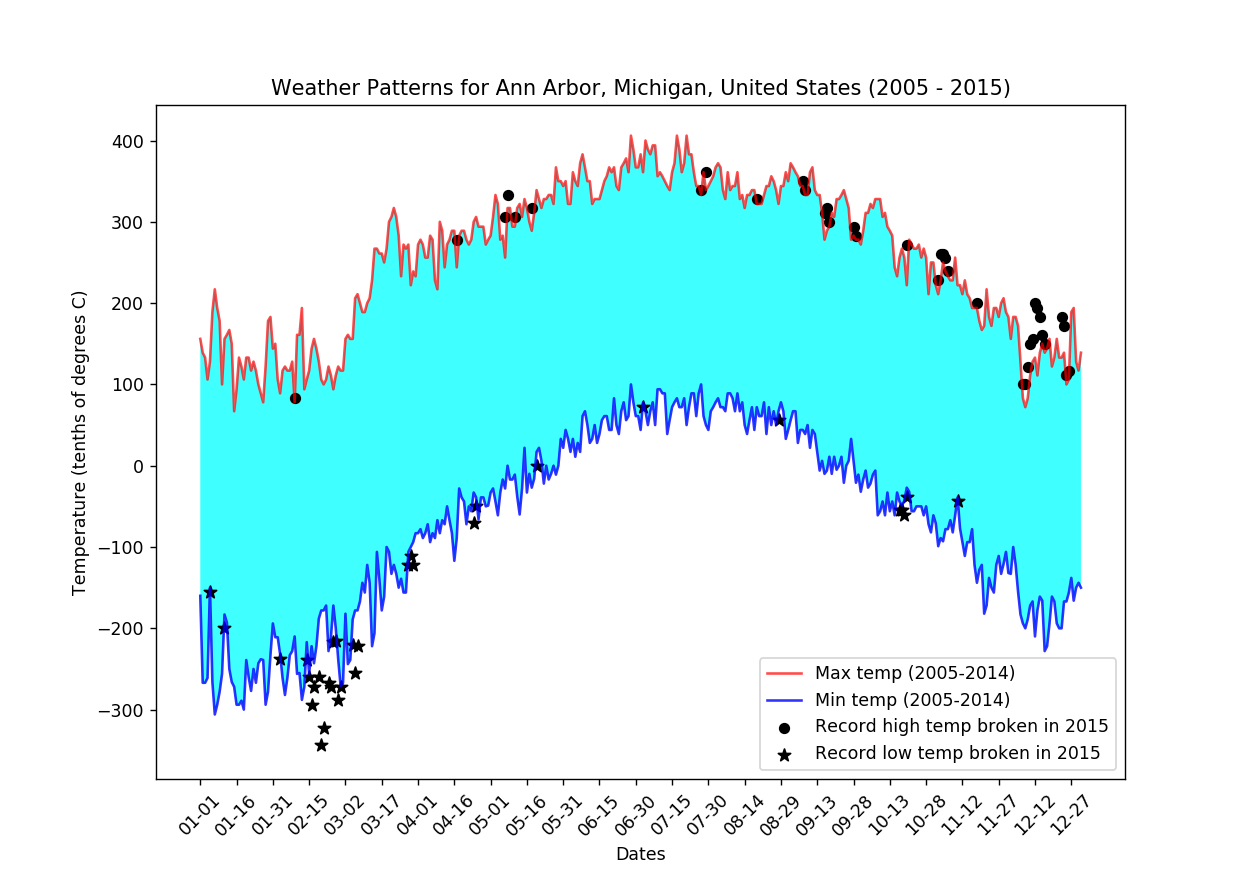

In [44]:
%matplotlib notebook

plt.figure(figsize=(10,7))

# line graph of the record high and record low temperatures 

plt.plot(max_t.values, '-r', label = "Max temp (2005-2014)", alpha = 0.7 )
plt.plot(min_t.values, '-b', label = "Min temp (2005-2014)", alpha = 0.8)

#shading area between record high and low temperatures

plt.gca().fill_between(range(len(max_t)), max_t["Data_Value"], min_t["Data_Value"], facecolor='aqua', alpha=0.75)

#overlay of the 2015 data points (highs and lows) for which the ten year record (2005-2014) was broken 

plt.scatter(max_br, max_t_2015.iloc[max_br], s=30, color='black', label="Record high temp broken in 2015")
plt.scatter(min_br, min_t_2015.iloc[min_br], s=55, color='black', label="Record low temp broken in 2015", marker= "*")

# creating labels, title, setting ticks and calling legend

plt.title("Weather Patterns for Ann Arbor, Michigan, United States (2005 - 2015)" )
plt.xlabel("Dates")
plt.ylabel("Temperature (tenths of degrees C)")
plt.xticks(range(0, len(max_t), 15), dates[range(0, len(max_t), 15)], rotation = "45") # rotate for better visiblity
plt.legend()